In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Electric_Vehicle_Population_data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,15.0,249905295,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1G1FY6S03L,Kitsap,Kingston,WA,98346.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,23.0,141133765,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303594e+10
2,KNDCE3LG9K,King,Seattle,WA,98125.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,46.0,3410074,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP8E,Thurston,Olympia,WA,98506.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,182436474,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJXCAE29L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10


In [2]:
df.shape

(239747, 17)

In [3]:
df.size

4075699

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
# Get basic information about the dfset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239747 entries, 0 to 239746
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         239747 non-null  object 
 1   County                                             239744 non-null  object 
 2   City                                               239744 non-null  object 
 3   State                                              239747 non-null  object 
 4   Postal Code                                        239744 non-null  float64
 5   Model Year                                         239747 non-null  int64  
 6   Make                                               239747 non-null  object 
 7   Model                                              239747 non-null  object 
 8   Electric Vehicle Type                              239747 non-null  object

In [6]:
# Standardize column names: lowercase, replace spaces with underscores, remove special chars
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace(r'[^\w]', '', regex=True)
)

In [7]:
# Change data types
df['model_year'] = df['model_year'].astype(int)
df['electric_range'] = pd.to_numeric(df['electric_range'], errors='coerce')


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239747 entries, 0 to 239746
Data columns (total 17 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   vin_110                                          239747 non-null  object 
 1   county                                           239744 non-null  object 
 2   city                                             239744 non-null  object 
 3   state                                            239747 non-null  object 
 4   postal_code                                      239744 non-null  float64
 5   model_year                                       239747 non-null  int64  
 6   make                                             239747 non-null  object 
 7   model                                            239747 non-null  object 
 8   electric_vehicle_type                            239747 non-null  object 
 9   clean_alternati

In [9]:
# Rename columns for clarity
df.rename(columns={'vin_110': 'vehicle_id','make': 'manufacturer','model': 'model_name'}, inplace=True)

In [10]:
df['clean_alternative_fuel_vehicle_cafv_eligibility'].unique()

array(['Not eligible due to low battery range',
       'Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [11]:
df.describe()


,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
count,239744.000000,239747.000000,239698.000000,239698.000000,239232.000000,2.397470e+05,2.397440e+05
mean,98176.643908,2021.460681,45.562283,770.534110,28.876643,2.363185e+08,5.297838e+10
std,2538.393709,2.995484,83.432590,7096.684269,14.896805,6.765169e+07,1.557184e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.071293e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.533600e+08,5.303303e+10
75%,98375.000000,2024.000000,38.000000,0.000000,42.000000,2.701756e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [12]:
# Check for missing values
df.isnull().sum()

vehicle_id                                           0
county                                               3
city                                                 3
state                                                0
postal_code                                          3
model_year                                           0
manufacturer                                         0
model_name                                           0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_cafv_eligibility      0
electric_range                                      49
base_msrp                                           49
legislative_district                               515
dol_vehicle_id                                       0
vehicle_location                                    10
electric_utility                                     3
2020_census_tract                                    3
dtype: int64

In [13]:
# Fill missing values for numerical columns with the mean
df['electric_range'].fillna(df['electric_range'].mean(), inplace=True)
df['base_msrp'].fillna(df['base_msrp'].mean(), inplace=True)
df['legislative_district'].fillna(df['legislative_district'].mean(), inplace=True)
df['2020_census_tract'].fillna(df['2020_census_tract'].mean(), inplace=True)


C:\Users\jvnab\AppData\Local\Temp\ipykernel_23224\534452020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['electric_range'].fillna(df['electric_range'].mean(), inplace=True)
C:\Users\jvnab\AppData\Local\Temp\ipykernel_23224\534452020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [14]:
# Fill missing values for categorical columns with the mode
df['county'].fillna(df['county'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['postal_code'].fillna(df['postal_code'].mode()[0], inplace=True)
df['vehicle_location'].fillna(df['vehicle_location'].mode()[0], inplace=True)
df['electric_utility'].fillna(df['electric_utility'].mode()[0], inplace=True)

C:\Users\jvnab\AppData\Local\Temp\ipykernel_23224\3297579245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['county'].fillna(df['county'].mode()[0], inplace=True)
C:\Users\jvnab\AppData\Local\Temp\ipykernel_23224\3297579245.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [15]:
df.isnull().sum()

vehicle_id                                         0
county                                             0
city                                               0
state                                              0
postal_code                                        0
model_year                                         0
manufacturer                                       0
model_name                                         0
electric_vehicle_type                              0
clean_alternative_fuel_vehicle_cafv_eligibility    0
electric_range                                     0
base_msrp                                          0
legislative_district                               0
dol_vehicle_id                                     0
vehicle_location                                   0
electric_utility                                   0
2020_census_tract                                  0
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(239747, 17)

In [ ]:
df

# Analysis


### BEV vs PHEV Distribution in Washington State

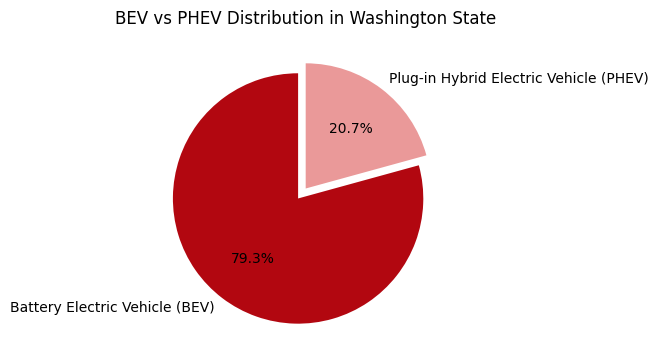

In [ ]:

counts = df['electric_vehicle_type'].value_counts()

plt.figure(figsize=(6,6))
counts.plot.pie(
    autopct='%1.1f%%',       
    labels=counts.index,      
    startangle=90,            
    colors=['#b20710', '#ea9999'],  
    explode=(0.1, 0) ,
)
plt.title('BEV vs PHEV Distribution in Washington State')
plt.ylabel('')                
plt.tight_layout()
plt.show()


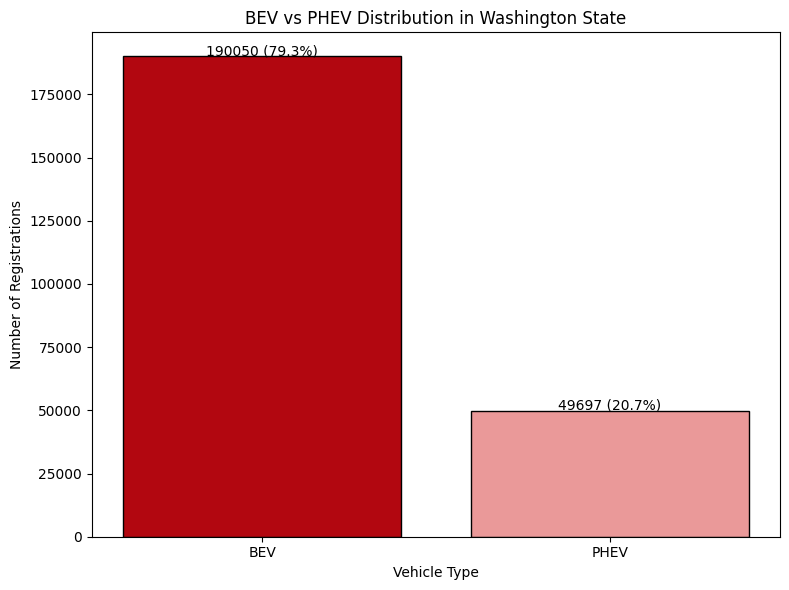

In [ ]:
# Compute total registrations for each type
total_bev = df[df['electric_vehicle_type'] == 'Battery Electric Vehicle (BEV)'].shape[0]
total_phev = df[df['electric_vehicle_type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].shape[0]

distribution = pd.DataFrame({
    'Type': ['BEV', 'PHEV'],
    'Count': [total_bev, total_phev]
})
distribution['Percentage'] = (distribution['Count'] / distribution['Count'].sum()) * 100

plt.figure(figsize=(8, 6))
plt.bar(distribution['Type'], distribution['Count'], color=['#b20710', '#ea9999'], edgecolor='black')
for i, (count, percentage) in enumerate(zip(distribution['Count'], distribution['Percentage'])):
    plt.text(i, count + 500, f"{count} ({percentage:.1f}%)", ha='center', fontsize=10)

plt.title('BEV vs PHEV Distribution in Washington State')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()

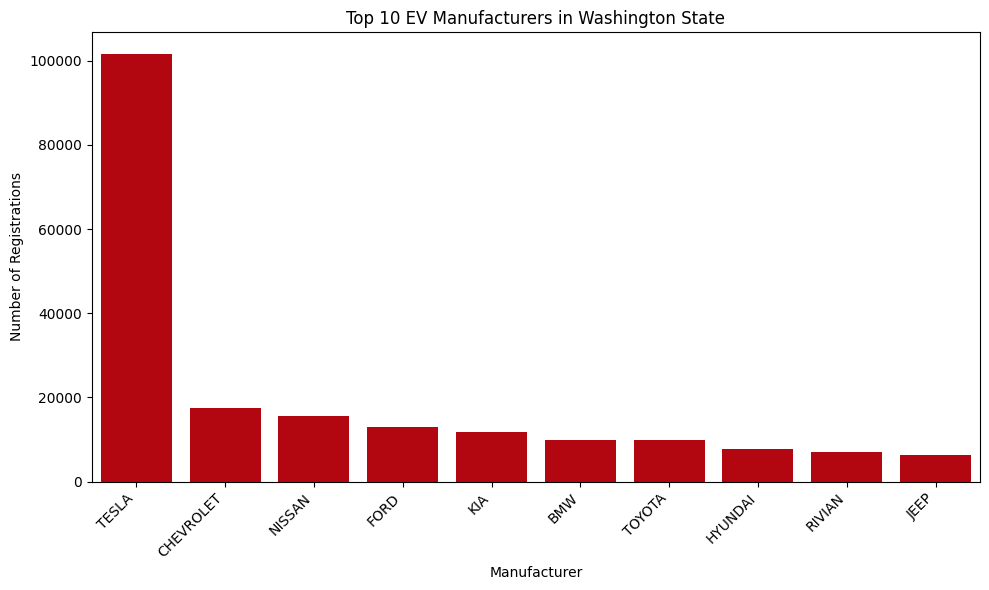

In [ ]:

top10 = df['manufacturer'].value_counts().nlargest(10)


plt.figure(figsize=(10, 6))
top10.plot(kind='bar', color=['#b20710'])
top10.set_xticklabels(data.index, fontfamily='serif', rotation=0)
plt.bar(top10.index, top10.values, color='#b20710')
plt.title('Top 10 EV Manufacturers in Washington State')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

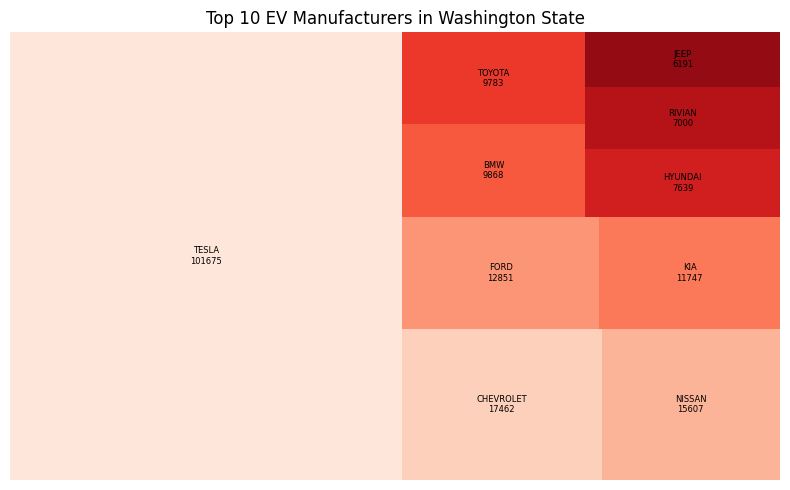

In [ ]:
import squarify

top10 = df['manufacturer'].value_counts().nlargest(10)
labels = [f"{m}\n{v}" for m, v in zip(top10.index, top10.values)]
sizes = top10.values

plt.figure(figsize=(8, 5))
squarify.plot(sizes=sizes, label=labels, text_kwargs={'fontsize': 6},color=sns.color_palette("Reds", n_colors=len(top10)))
plt.title('Top 10 EV Manufacturers in Washington State')
plt.axis('off')
plt.tight_layout()
plt.show()

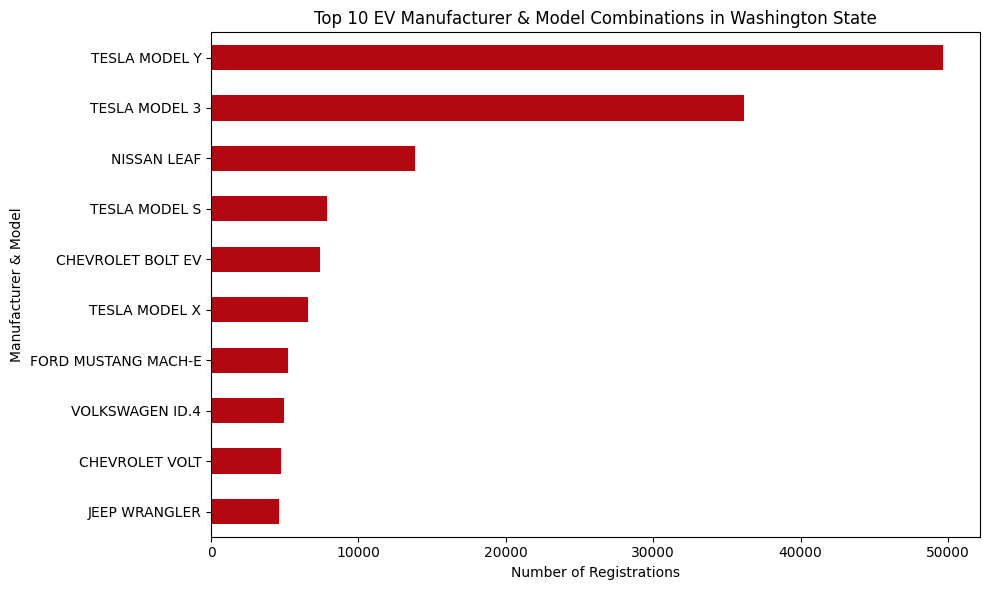

In [ ]:

df['manu_model'] = df['manufacturer'] + ' ' + df['model_name']


top10_combo = df['manu_model'].value_counts().nlargest(10)


plt.figure(figsize=(10, 6))
top10_combo.plot(
    kind='barh',
    color='#b20710'     
)
plt.title('Top 10 EV Manufacturer & Model Combinations in Washington State')
plt.xlabel('Number of Registrations')
plt.ylabel('Manufacturer & Model')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

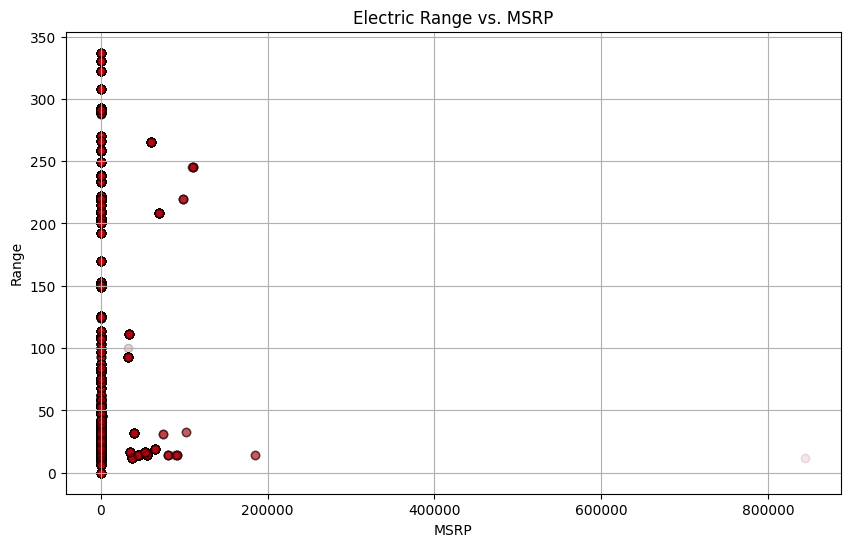

In [ ]:
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
df['electric_range'] = pd.to_numeric(df['electric_range'], errors='coerce')
df['base_masrp'] = pd.to_numeric(df['base_msrp'], errors='coerce')


plt.figure(figsize=(10, 6))
plt.scatter(df['base_msrp'], df['electric_range'], alpha=0.1, c='#b20710', edgecolors='black')
plt.title("Electric Range vs. MSRP")
plt.xlabel("MSRP")
plt.ylabel("Range")
plt.grid(True)
plt.show()






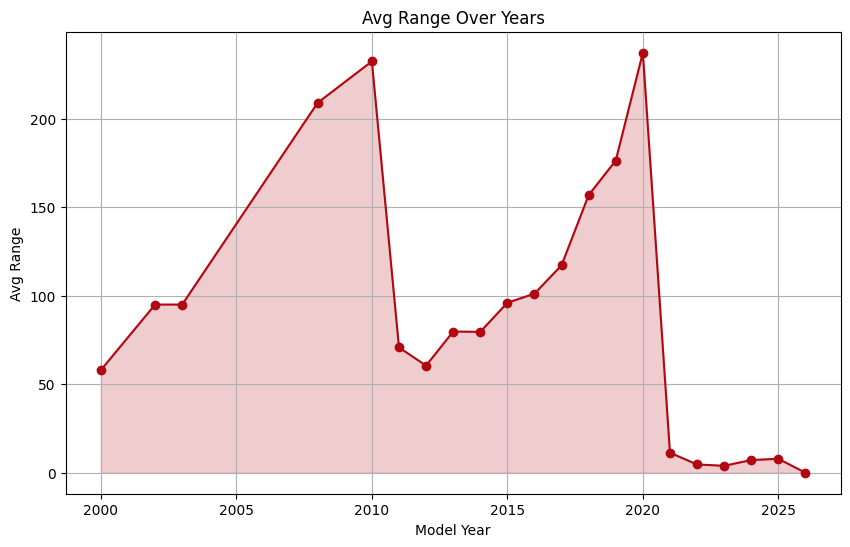

In [ ]:

avg = df.groupby('model_year')['electric_range'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg.index, avg.values, marker='o', color='#b20710')
plt.fill_between(avg.index, avg.values, color='#b20710', alpha=0.2)
plt.title("Avg Range Over Years")
plt.xlabel("Model Year")
plt.ylabel("Avg Range")
plt.grid(True)
plt.show()

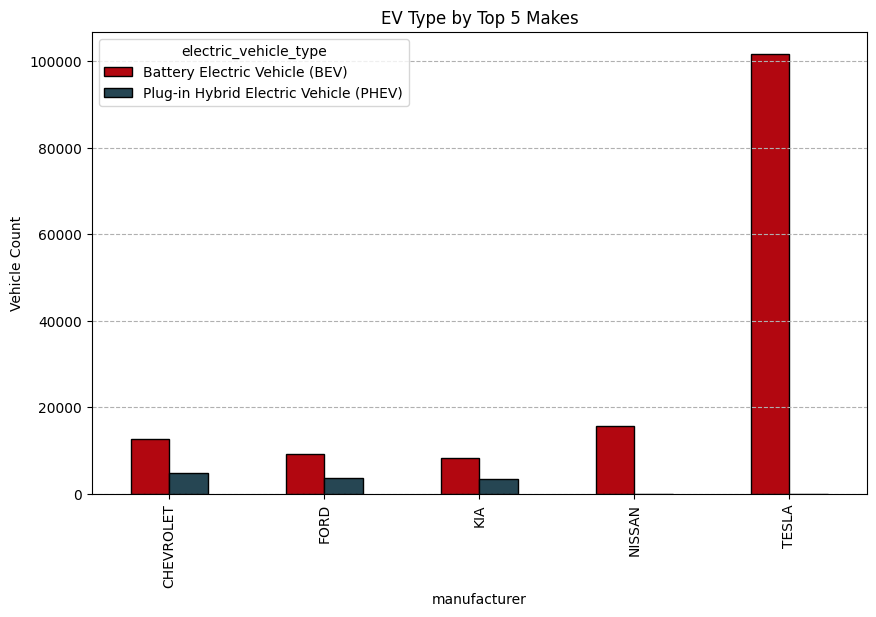

In [ ]:

top_makes = df['manufacturer'].value_counts().head(5).index
subset = df[df['manufacturer'].isin(top_makes)]
grouped = subset.groupby(['manufacturer', 'electric_vehicle_type']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(10, 6), color=['#b20710', '#264653'], edgecolor='black')
plt.title("EV Type by Top 5 Makes")
plt.ylabel("Vehicle Count")
plt.grid(axis='y', linestyle='--')
plt.show()

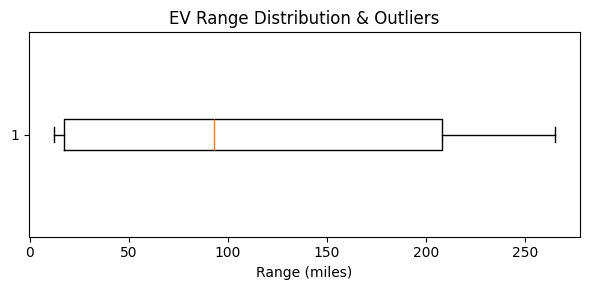

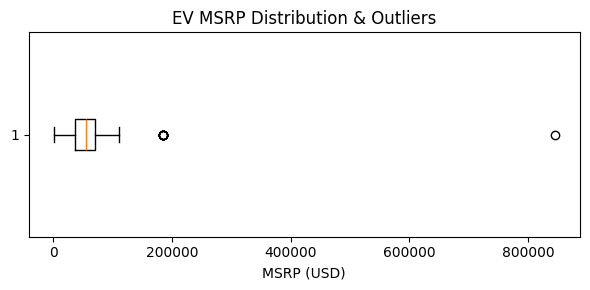

In [ ]:

df = df[(df['electric_range'] > 0) & (df['base_msrp'] > 0)].copy()

plt.figure(figsize=(6,3))
plt.boxplot(df['electric_range'],vert=False)
plt.title('EV Range Distribution & Outliers')
plt.xlabel('Range (miles)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
plt.boxplot(df['base_msrp'],vert=False)
plt.title('EV MSRP Distribution & Outliers')
plt.xlabel('MSRP (USD)')
plt.tight_layout()
plt.show()



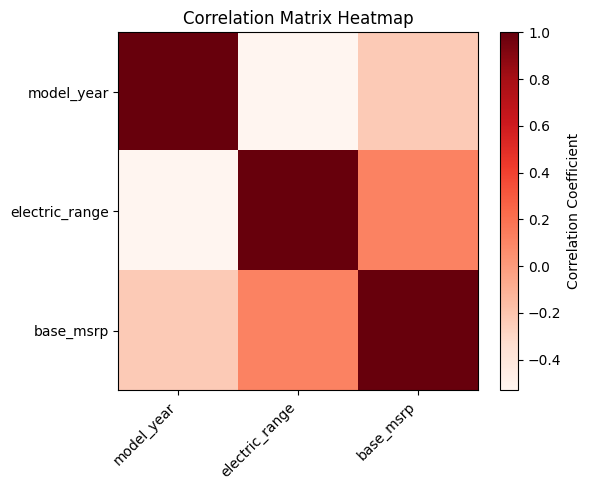

In [ ]:
#  Compute correlation
corr = df[['model_year', 'electric_range', 'base_msrp']].corr()
plt.figure(figsize=(6, 5))
plt.imshow(corr, aspect='auto', cmap='Reds') 
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


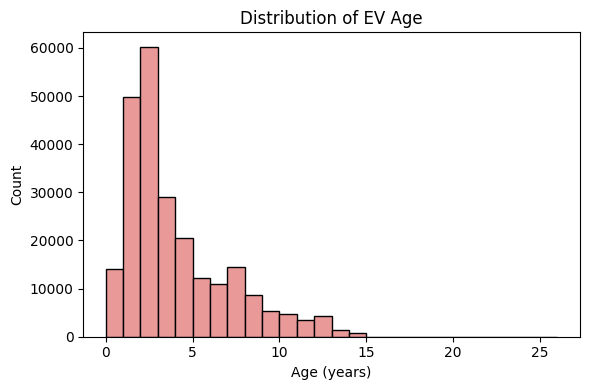

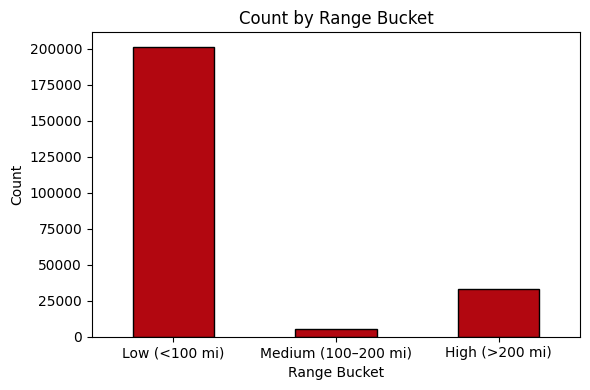

In [ ]:

current_year = 2025
df['age'] = current_year - df['model_year']

bins = [0, 100, 200, df['electric_range'].max()+1]
labels = ['Low (<100 mi)', 'Medium (100–200 mi)', 'High (>200 mi)']
df['range_bucket'] = pd.cut(df['electric_range'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(6, 4))
plt.hist(df['age'], bins=range(0, df['age'].max()+2), edgecolor='black', color='#ea9999')
plt.title('Distribution of EV Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


bucket_counts = df['range_bucket'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
bucket_counts.plot(kind='bar', color='#b20710', edgecolor='black')
plt.title('Count by Range Bucket')
plt.xlabel('Range Bucket')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


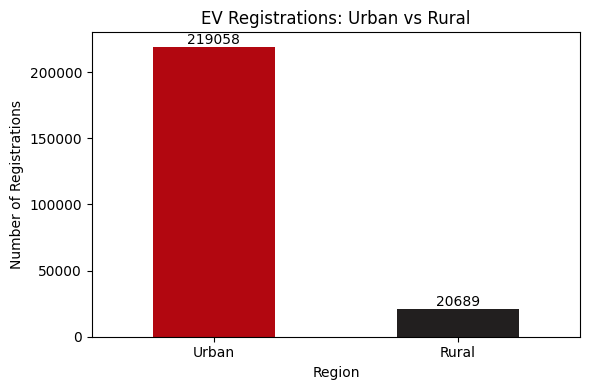

In [ ]:

top10 = df['county'].value_counts().nlargest(10).index
df['region'] = df['county'].apply(lambda x: 'Urban' if x in top10 else 'Rural')


region_counts = df['region'].value_counts()


plt.figure(figsize=(6, 4))
colors = {'Urban': '#b20710', 'Rural': '#221f1f'}
bars = region_counts.plot(
    kind='bar',
    color=[colors[r] for r in region_counts.index]
)

plt.title('EV Registrations: Urban vs Rural')
plt.xlabel('Region')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=0)


for i, count in enumerate(region_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

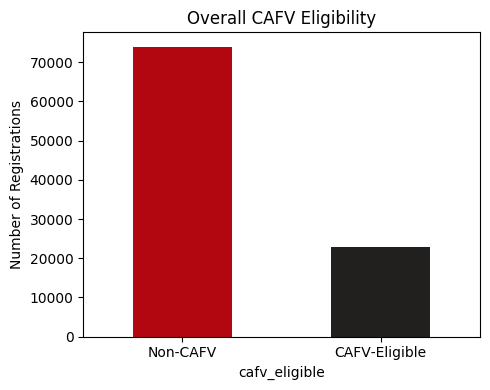

In [ ]:
# Standardize
df = df.rename(columns={
	'county': 'county',
	'electric_vehicle_type': 'vehicle_type',
	'clean_alternative_fuel_vehicle_cafv_eligibility': 'cafv_eligible'
})
df['cafv_eligible'] = df['cafv_eligible'].map({'Clean Alternative Fuel Vehicle Eligible': True, 'Not eligible due to low battery range': False})


counts = df['cafv_eligible'].value_counts()
plt.figure(figsize=(5,4))
counts.plot(kind='bar', color=['#b20710','#221f1f'])
plt.xticks([0,1], ['Non‑CAFV','CAFV‑Eligible'], rotation=0)
plt.title('Overall CAFV Eligibility')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()





<Figure size 600x400 with 0 Axes>

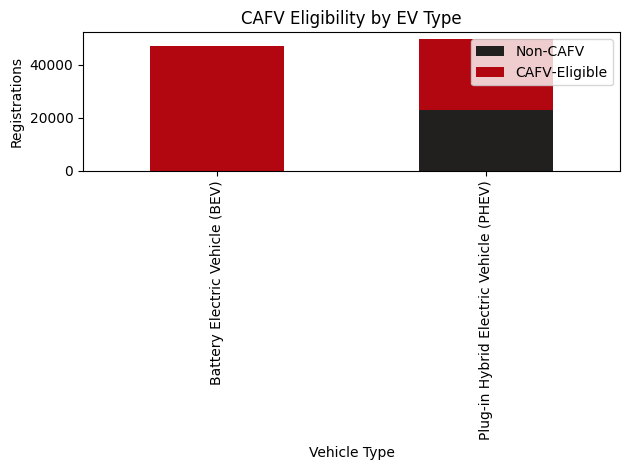

In [28]:
# 3. CAFV by EV type
ct = pd.crosstab(df['vehicle_type'], df['cafv_eligible'])
plt.figure(figsize=(6,4))
ct.plot(kind='bar', stacked=True, color=['#221f1f','#b20710'])
plt.title('CAFV Eligibility by EV Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Registrations')
plt.legend(['Non‑CAFV','CAFV‑Eligible'], title='')
plt.tight_layout()
plt.show()

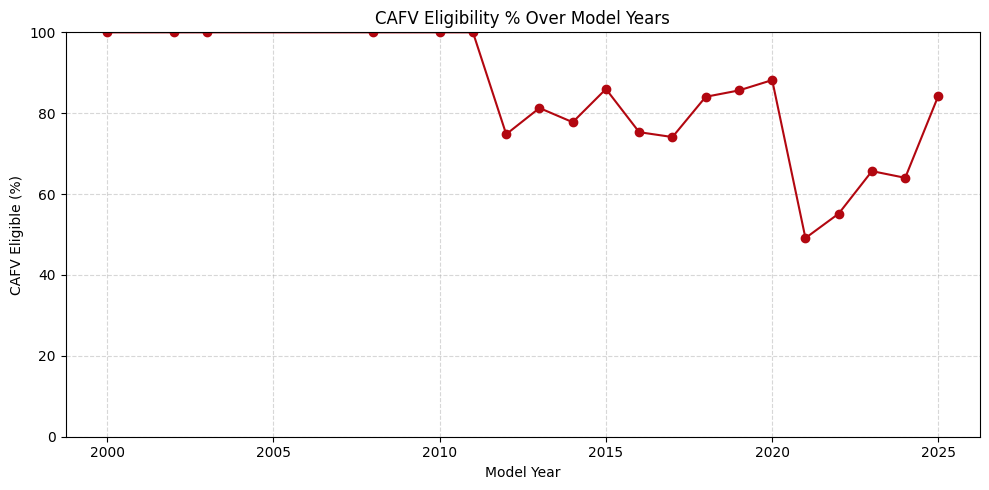

In [30]:

# Select only the relevant columns for analysis
df_subset = df[['model_year', 'cafv_eligible']].copy()

# Map 'cafv_eligible' column values to binary (1 for eligible, 0 for not eligible)
df_subset['cafv_eligible'] = df_subset['cafv_eligible'].map({True: 1, False: 0})

# Drop rows with missing values in the relevant columns
df_subset = df_subset.dropna(subset=['model_year', 'cafv_eligible'])

# Ensure 'model_year' is of integer type
df_subset['model_year'] = df_subset['model_year'].astype(int)

# 2. Group by year and compute rates
yearly = df_subset.groupby('model_year')['cafv_eligible'].mean() * 100  # percentage

# 3. Plot trend line
plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker='o', color='#b20710')
plt.title('CAFV Eligibility % Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('CAFV Eligible (%)')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


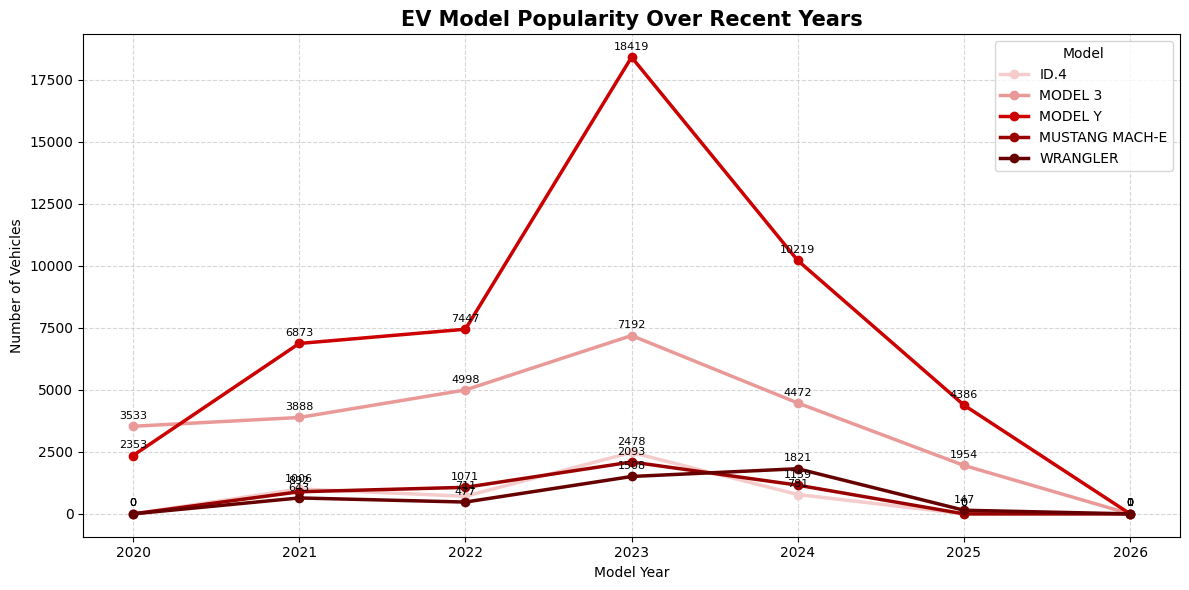

In [31]:

# Group and count EV models by year
top_models_by_year = df.groupby(['model_year', 'model_name']).size().reset_index(name='Count')

# Focus on last 5 years for trend
recent_years = top_models_by_year['model_year'].sort_values(ascending=False).unique()[:7]
filtered = top_models_by_year[top_models_by_year['model_year'].isin(recent_years)]

# Get top 5 models across recent years
top_models = (
    filtered.groupby('model_name')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

plot_df = filtered[filtered['model_name'].isin(top_models)]

# Pivot for plotting
pivot_df = plot_df.pivot(index='model_year', columns='model_name', values='Count').fillna(0)

# Sort years for X-axis
pivot_df = pivot_df.sort_index()

# Plot styled line chart
fig, ax = plt.subplots(figsize=(12, 6))
# colors = ['#b20710', '#660708', '#d94a38', '#aa4a44', '#000000']
colors = ['#f4cccc', '#ea9999', '#cc0000', '#990000', '#660000']
for i, model in enumerate(pivot_df.columns):
    ax.plot(pivot_df.index, pivot_df[model], marker='o', label=model, linewidth=2.5, color=colors[i])

# Annotations
for model in pivot_df.columns:
    for x, y in zip(pivot_df.index, pivot_df[model]):
        ax.text(x, y + 300, int(y), ha='center', fontsize=8)

# Style
ax.set_title("EV Model Popularity Over Recent Years", fontsize=15, fontweight='bold')
ax.set_xlabel("Model Year")
ax.set_ylabel("Number of Vehicles")
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title="Model")
plt.xticks(pivot_df.index, rotation=0)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

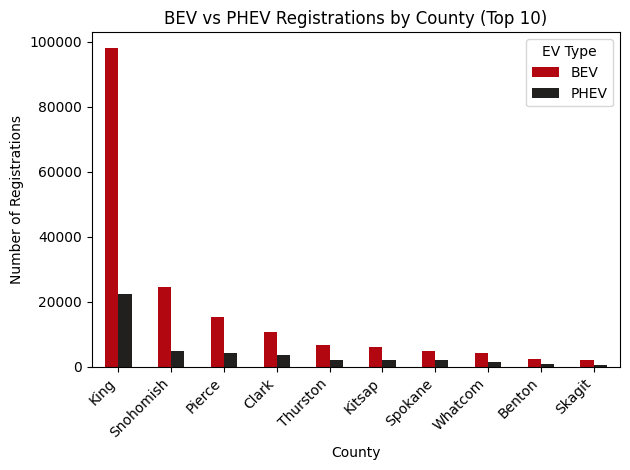

In [23]:
# 5. Plot a side-by-side bar chart
plt.figure(figsize=(10, 6))
plot_df.plot(
    kind='bar',
    stacked=False,
    color=['#b20710', '#221f1f']
)
plt.title('BEV vs PHEV Registrations by County (Top 10)')
plt.xlabel('County')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45, ha='right')
plt.legend(['BEV', 'PHEV'], title='EV Type')
plt.tight_layout()
plt.show()

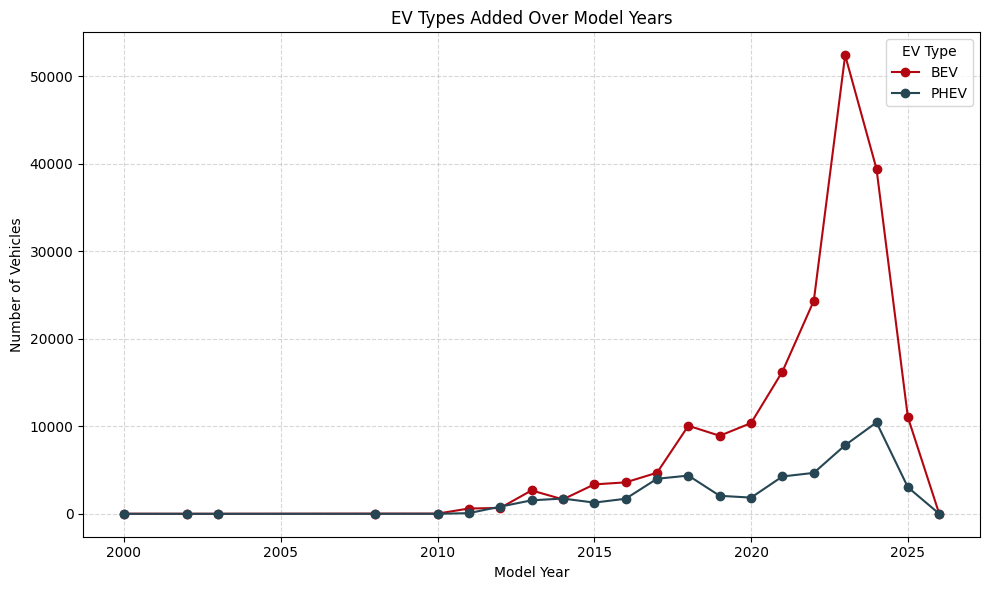

In [26]:
# Group data by model_year and electric_vehicle_type, then count the number of vehicles
ev_counts_by_year = df.groupby(['model_year', 'electric_vehicle_type']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ev_counts_by_year.index, ev_counts_by_year['Battery Electric Vehicle (BEV)'], label='BEV', marker='o', color='#b20710')
plt.plot(ev_counts_by_year.index, ev_counts_by_year['Plug-in Hybrid Electric Vehicle (PHEV)'], label='PHEV', marker='o', color='#264653')

# Add titles and labels
plt.title('EV Types Added Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='EV Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

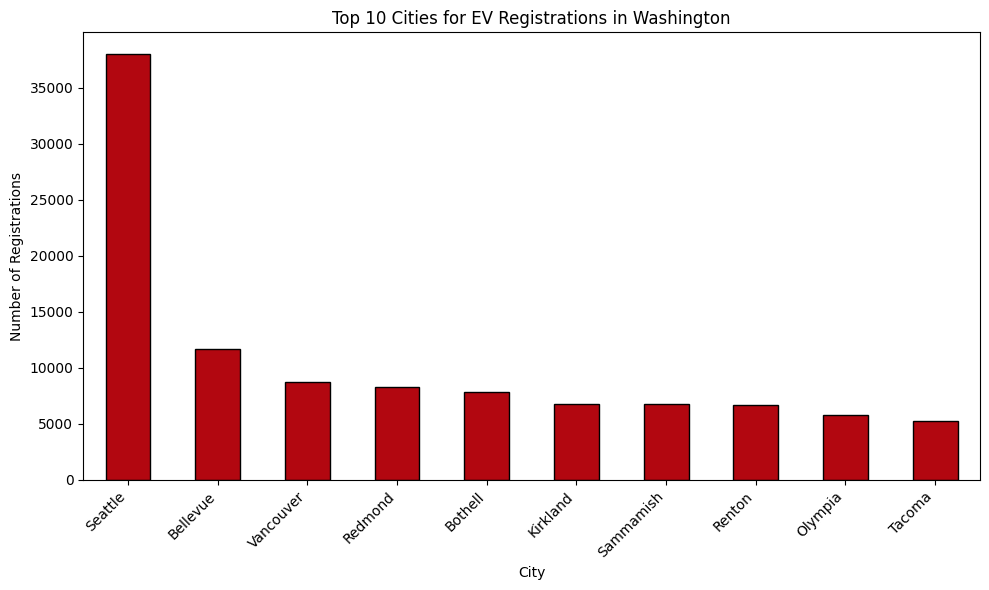

In [27]:
# Group by city and sum the counts
top_cities = df.groupby('city').size().sort_values(ascending=False).head(10)

# Plot the top 10 cities
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='#b20710', edgecolor='black')
plt.title('Top 10 Cities for EV Registrations in Washington')
plt.xlabel('City')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gradio App

In [ ]:
import gradio as gr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset once 
df = pd.read_csv("electric_cars.csv")
df.columns = df.columns.str.strip()
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].fillna("Unknown")
df['Make'] = df['Make'].fillna("Unknown")
df['Model'] = df['Model'].fillna("Unknown")
df.dropna(subset=['Model Year'], inplace=True)

# Summary text
def get_summary_text():
    summary = {
        "🚗 Total Cars": len(df),
        "📦 Unique Models": df['Model'].nunique(),
        "🏆 Top Manufacturer": df['Make'].value_counts().idxmax(),
        "🔋 Avg Electric Range": f"{df['Electric Range'].mean():.2f} km",
        "💰 Avg MSRP": f"${df['Base MSRP'].mean():,.2f}"
    }
    return "\n".join([f"{k}: {v}" for k, v in summary.items()])

# Plot generator
def plot_eda(plot_type):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.xticks(rotation=45)

    if plot_type == "Electric Vehicle Type Count":
        sns.countplot(y='Electric Vehicle Type', data=df, order=df['Electric Vehicle Type'].value_counts().index, ax=ax)
    elif plot_type == "EVs Over Model Years":
        df['Model Year'].value_counts().sort_index().plot(kind='line', marker='o', ax=ax)
        ax.set_xlabel("Model Year"); ax.set_ylabel("Count")
    elif plot_type == "Top 10 Makes":
        top_makes = df['Make'].value_counts().head(10)
        sns.barplot(x=top_makes.values, y=top_makes.index, ax=ax)
    elif plot_type == "Top 10 Models":
        top_models = df['Model'].value_counts().head(10)
        sns.barplot(x=top_models.values, y=top_models.index, ax=ax)
    elif plot_type == "Top 10 Counties":
        top_counties = df['County'].value_counts().head(10)
        sns.barplot(x=top_counties.values, y=top_counties.index, ax=ax)
    elif plot_type == "Electric Range Distribution":
        sns.histplot(df['Electric Range'].dropna(), bins=30, kde=True, ax=ax)
    elif plot_type == "CAFV Eligibility Pie Chart":
        ax.clear()
        counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')
    elif plot_type == "Average Range by Vehicle Type":
        avg_range = df.groupby('Electric Vehicle Type')['Electric Range'].mean().sort_values()
        sns.barplot(x=avg_range.values, y=avg_range.index, ax=ax)
    elif plot_type == "Average MSRP by Vehicle Type":
        avg_msrp = df.groupby('Electric Vehicle Type')['Base MSRP'].mean().sort_values()
        sns.barplot(x=avg_msrp.values, y=avg_msrp.index, ax=ax)

    plt.tight_layout()
    return fig

# Car Finder
def car_finder(budget, min_range, min_year):
    results = df[
        (df['Base MSRP'] <= budget) &
        (df['Electric Range'] >= min_range) &
        (df['Model Year'] >= min_year)
    ][['Make', 'Model', 'Model Year', 'Electric Range', 'Base MSRP', 'Electric Vehicle Type']]
    return results.reset_index(drop=True)

# Gradio Web App
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Image(value="logo car.png", label="Electric Vehicle Dashboard Logo", show_label=True)
    
    gr.Markdown("# ⚡ Electric Vehicle Dashboard")
    gr.Markdown("Explore electric vehicle data with visual EDA tools and car finder functionality. This version uses a built-in dataset, no upload needed!")

    # Dataset Summary
    gr.Markdown("### 📊 Dataset Summary")
    gr.Textbox(value=get_summary_text(), lines=6, interactive=False)

    # EDA Section
    gr.Markdown("### 🔬 EDA Visualizations")
    plot_dropdown = gr.Dropdown(
        choices=[
            "Electric Vehicle Type Count",
            "EVs Over Model Years",
            "Top 10 Makes",
            "Top 10 Models",
            "Top 10 Counties",
            "Electric Range Distribution",
            "CAFV Eligibility Pie Chart",
            "Average Range by Vehicle Type",
            "Average MSRP by Vehicle Type"
        ],
        label="Choose Analysis Type"
    )
    eda_plot = gr.Plot()
    plot_dropdown.change(fn=plot_eda, inputs=plot_dropdown, outputs=eda_plot)

    # Car Finder Section
    gr.Markdown("### 🔍 EV Finder Tool")
    with gr.Row():
        budget = gr.Number(value=40000, label="💰 Max Budget ($)")
        min_range = gr.Number(value=200, label="🔋 Min Range (km)")
        min_year = gr.Number(value=2018, label="📅 Model Year From")
    car_output = gr.Dataframe(label="✅ Matching Cars")
    find_btn = gr.Button("Find Cars 🚀")
    find_btn.click(fn=car_finder, inputs=[budget, min_range, min_year], outputs=car_output)

# Launch with public link
demo.launch(share=True)
